# Enunciado

Se desea obtener la densidad de una esfera a partir de mediciones de su diámetro $d$ y su masa $m$, de forma que el modelo de la medición viene dado por:

$$\rho=\frac{6m}{\pi d^3}$$

Sabiendo que:

|n|Masa (g)|Diámetro (mm)|
|:-:|:----:|:--------:|
|1|543.12|120.02|
|2|543.10|120.09|
|3|543.16|120.12|
|4|543.13|119.94|
|5|543.12|120.01|

Donde para la balanza se tiene que el error y su incertidumbre por el certificado está dada como $(0.03\pm0.01)\textrm{ g}$ y la resolución de la balanza es de $0.01\textrm{g}$. Para el vernier, se cuenta con que su error máximo permitido es $\pm0.04\textrm{ mm}$ y su resolución es de $0.01\textrm{mm}$.

# Solución

In [1]:
# se realizan las importaciones necesarios
import numpy as np
from numpy.random import normal
from numpy.random import uniform
import matplotlib.pyplot as plt
from scipy import stats
print("Todas las librerías han sido importadas.")

Todas las librerías han sido importadas.


In [2]:
M=10**6

In [3]:
masa=np.array([543.12,543.10,543.16,543.13,543.12])
diámetro=np.array([120.02,120.09,120.12,119.94,120.01])

## Modelos de masa, diámetro y densidad

In [4]:
def Densidad(m,d):
    return 6*m/np.pi/d**3

## Muestreos aleatorios

In [5]:
m_res=uniform(-0.01/2,0.01/2,size=M)
m_rep=normal(0,masa.std()/np.sqrt(len(masa)),size=M)
m_cert=normal(-0.03,0.01/2,size=M)

In [6]:
d_res=uniform(-0.01/2,0.01/2,size=M)
d_rep=normal(0,diámetro.std()/np.sqrt(len(diámetro)),size=M)
d_emp=uniform(-0.04,0.04,size=M)

## Obtención de la distribución de probabilidad discreta

In [7]:
masa=masa.mean()+m_res+m_rep+m_cert
diámetro=diámetro.mean()+d_res+d_rep+d_emp

In [8]:
rho=Densidad(masa,diámetro)

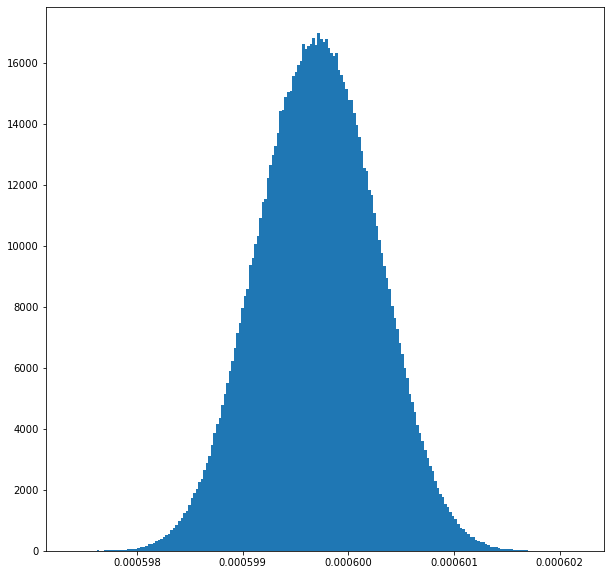

In [9]:
plt.figure(figsize=(10,10))
plt.hist(rho,bins=200,density=False)
plt.show()

In [10]:
# Media e incertidumbre estándar combinada
rho.mean(),rho.std()

(0.0005997130527409571, 5.502920290483334e-07)

In [11]:
dist=getattr(stats,'norm')
dist.fit(Densidad(masa,diámetro))

(0.0005997130527409571, 5.502920290483334e-07)

In [12]:
stats.kstest(Densidad(masa,diámetro), "norm", dist.fit(Densidad(masa,diámetro)))

KstestResult(statistic=0.005911027502368327, pvalue=8.92025914910408e-31)